In [1]:
import torch
import numpy as np

In [4]:
torch.normal(0, 1, (2, 4))

tensor([[ 0.1419,  0.0333, -0.5132,  1.1087],
        [-1.4777, -0.7418, -1.0676, -0.6446]])

In [9]:
torch.ones((2,1))

tensor([[1.],
        [1.]])

In [11]:
len(torch.Tensor([2.4, 2]))

2

In [122]:
import random
def generate_train_data(w, b, samples_num):
    """生成随机训练数据"""
    x = torch.normal(0, 1, (samples_num, len(w)))
    y = linear_regression(w, b, x)
    y += torch.normal(0, 0.1, y.shape)
    
    return x, y

def squared_loss(y, y_hat):
    return 0.5 * (y - y_hat.reshape(y.shape)) ** 2


def linear_regression(w, b, x):
    y = torch.matmul(x, w) + b
    return y

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            
def data_iter(x, y, batch_size):
    indices = list(range(len(y)))
    random.shuffle(indices)
    for i in range(0, len(y), batch_size):
        sample_index = indices[i:min(i + batch_size, len(y))]
        yield x[sample_index], y[sample_index]

In [123]:
true_w = torch.Tensor([2.4, 3])
true_b = 4
samples_num = 200
train_x, train_y = generate_train_data(true_w, true_b, samples_num)

In [124]:
train_x.shape

torch.Size([200, 2])

Text(0.5, 1.0, '训练样本')

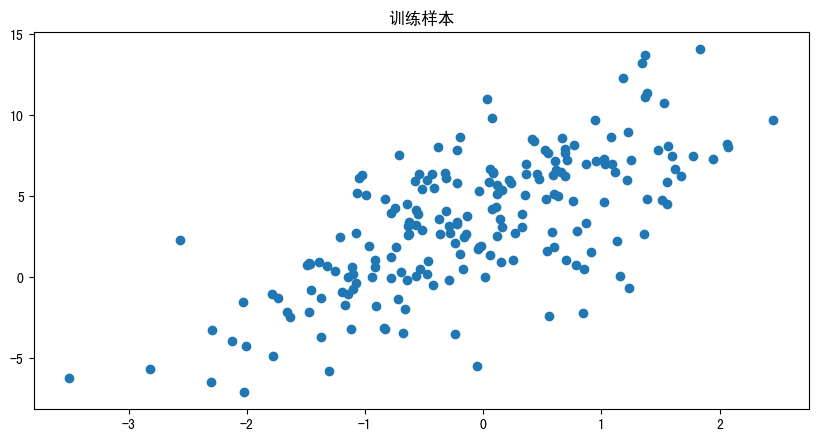

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,5), dpi=100)
plt.scatter(train_x[:, 0].detach().numpy(), train_y.detach().numpy())
plt.title('训练样本')

In [135]:
w = torch.normal(mean=0, std=1, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [136]:
w

tensor([[-0.5438],
        [-2.1507]], requires_grad=True)

In [137]:
b

tensor([0.], requires_grad=True)

In [138]:
lr = 0.03
batch_size = 10
epoch = 10

for ep in range(epoch):
    for x, y in data_iter(train_x, train_y, batch_size):
        y_hat = linear_regression(w, b, x)
        loss = squared_loss(y, y_hat)
        loss.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        y_hat = linear_regression(w, b, x)
        loss = squared_loss(y, y_hat)
    print('epoch: {} , squared loss: {}'.format(ep, loss.mean()))

epoch: 0 , squared loss: 4.142693042755127
epoch: 1 , squared loss: 0.9017737507820129
epoch: 2 , squared loss: 0.41906505823135376
epoch: 3 , squared loss: 0.3290206789970398
epoch: 4 , squared loss: 0.040176812559366226
epoch: 5 , squared loss: 0.03281446173787117
epoch: 6 , squared loss: 0.00747916754335165
epoch: 7 , squared loss: 0.005919931922107935
epoch: 8 , squared loss: 0.007160825189203024
epoch: 9 , squared loss: 0.0038021665532141924


In [139]:
w

tensor([[2.3991],
        [2.9853]], requires_grad=True)

In [140]:
b

tensor([3.9831], requires_grad=True)

In [145]:
true_w.reshape(2, 1) - w

tensor([[0.0009],
        [0.0147]], grad_fn=<SubBackward0>)

In [146]:
true_b - b

tensor([0.0169], grad_fn=<RsubBackward1>)

## Pytorch简洁实现

In [147]:
import torch.nn as nn

In [148]:
net = nn.Sequential(nn.Linear(2, 1))

In [189]:
net[0].weight.data.normal_(0, 1)
net[0].bias.data.fill_(0)

tensor([0.])

In [154]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [155]:
true_w = torch.Tensor([2.4, 3])
true_b = 4
samples_num = 200
train_x, train_y = generate_train_data(true_w, true_b, samples_num)

In [158]:
type(train_y)

torch.Tensor

In [175]:
from torch.utils import data
def data_iter(x, y, batch_size, is_train=True):
    dataset = data.TensorDataset(x, y)
    dataset = data.DataLoader(dataset, batch_size, shuffle=is_train)
    return dataset

In [205]:
net[0].weight.data.normal_(0, 1)
net[0].bias.data.fill_(0)

tensor([0.])

In [207]:
batch_size = 10
epoch = 100
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss = nn.MSELoss()
for i in range(epoch):
    for x, y in data_iter(train_x, train_y.reshape(-1, 1), batch_size):
        batch_loss = loss(net(x), y)
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    print('epoch: {} , loss: {}'.format(i, loss(net(x), y)))
        

tensor([[-11.0620,  -9.2034]])
tensor([[-2.0907, -2.5534]])
tensor([[-5.6751, -0.2993]])
tensor([[-8.6254, -3.6669]])
tensor([[-5.1859, -3.6522]])
tensor([[-1.2703,  0.7383]])
tensor([[-2.0521,  1.4963]])
tensor([[-2.4410, -5.3908]])
tensor([[-7.2600, -1.4032]])
tensor([[-5.5400, -4.3227]])
tensor([[-4.6589, -3.8994]])
tensor([[-4.3860, -4.6178]])
tensor([[-2.3625, -8.1048]])
tensor([[-5.6433, -2.9961]])
tensor([[-0.8740, -0.1657]])
tensor([[-4.9462, -6.6822]])
tensor([[ 0.3488, -2.2358]])
tensor([[-3.1947, -3.5473]])
tensor([[-2.7347, -1.2232]])
tensor([[-4.5431, -1.2125]])
epoch: 0 , loss: 11.102617263793945
tensor([[-3.2525, -2.4622]])
tensor([[-2.2598, -2.8199]])
tensor([[-1.7740, -3.8303]])
tensor([[-2.4689,  0.1182]])
tensor([[-4.0084, -0.8292]])
tensor([[-2.1290, -2.0697]])
tensor([[-2.2272, -0.5062]])
tensor([[-2.8289, -1.6309]])
tensor([[-2.7576, -2.6453]])
tensor([[-3.3685, -2.5851]])
tensor([[-3.6229, -2.5262]])
tensor([[-2.5089, -1.3847]])
tensor([[-1.6959, -3.4085]])
tenso

tensor([[-0.0178,  0.0950]])
epoch: 22 , loss: 0.009754937142133713
tensor([[0.0215, 0.0534]])
tensor([[-0.0554, -0.0056]])
tensor([[-0.0107, -0.0634]])
tensor([[-0.1278, -0.2102]])
tensor([[-0.0359,  0.0357]])
tensor([[ 0.1458, -0.0275]])
tensor([[-0.0051,  0.0758]])
tensor([[-0.1031,  0.0482]])
tensor([[0.0824, 0.0308]])
tensor([[-0.0943, -0.0560]])
tensor([[0.0388, 0.0377]])
tensor([[-0.0465,  0.0527]])
tensor([[ 0.0076, -0.0438]])
tensor([[ 0.0383, -0.0459]])
tensor([[-0.0375,  0.0557]])
tensor([[-0.0703, -0.0537]])
tensor([[-0.0174,  0.0287]])
tensor([[ 0.1529, -0.0271]])
tensor([[0.1020, 0.1050]])
tensor([[0.0388, 0.0217]])
epoch: 23 , loss: 0.007751493714749813
tensor([[0.0071, 0.0221]])
tensor([[ 0.0463, -0.0469]])
tensor([[ 0.0634, -0.0338]])
tensor([[ 0.1448, -0.0578]])
tensor([[-0.0194,  0.0689]])
tensor([[0.1320, 0.0047]])
tensor([[-0.0225, -0.0249]])
tensor([[-0.0597, -0.0966]])
tensor([[-0.1034,  0.1024]])
tensor([[-0.0072,  0.1611]])
tensor([[-0.0189, -0.0170]])
tensor([

tensor([[-0.0783, -0.0588]])
tensor([[ 0.0562, -0.1311]])
tensor([[-0.0619, -0.0130]])
epoch: 47 , loss: 0.005480319261550903
tensor([[0.0728, 0.0874]])
tensor([[0.0896, 0.0305]])
tensor([[-0.0528, -0.0826]])
tensor([[ 0.0689, -0.0262]])
tensor([[ 0.1163, -0.0103]])
tensor([[0.1328, 0.0381]])
tensor([[-0.0124,  0.0306]])
tensor([[-0.0294, -0.0074]])
tensor([[-0.0807,  0.0194]])
tensor([[-0.0430, -0.0483]])
tensor([[-0.0973,  0.0601]])
tensor([[-0.0450,  0.0625]])
tensor([[ 0.0359, -0.0317]])
tensor([[0.0069, 0.0269]])
tensor([[-0.0521, -0.0653]])
tensor([[ 0.0120, -0.0145]])
tensor([[-0.0728,  0.0735]])
tensor([[0.0106, 0.0533]])
tensor([[-0.1442, -0.1094]])
tensor([[-0.0026, -0.1384]])
epoch: 48 , loss: 0.008990136906504631
tensor([[-0.0628, -0.1194]])
tensor([[-0.1004,  0.0092]])
tensor([[-0.0571,  0.0675]])
tensor([[-0.0146, -0.0181]])
tensor([[0.0297, 0.0191]])
tensor([[-0.0247,  0.1059]])
tensor([[0.0661, 0.1198]])
tensor([[-0.0820,  0.1362]])
tensor([[ 0.0155, -0.0381]])
tensor([

tensor([[0.0155, 0.0269]])
tensor([[0.0957, 0.0449]])
tensor([[0.0293, 0.0326]])
tensor([[ 0.0028, -0.0112]])
tensor([[ 0.0130, -0.0319]])
tensor([[0.1267, 0.0677]])
tensor([[-0.0169,  0.1136]])
tensor([[-0.0344,  0.0321]])
tensor([[-0.0184, -0.0922]])
tensor([[-0.0027,  0.0163]])
epoch: 71 , loss: 0.0032208245247602463
tensor([[-0.0308, -0.0782]])
tensor([[0.1150, 0.0129]])
tensor([[-0.0461, -0.0063]])
tensor([[-0.0299, -0.0441]])
tensor([[-0.0153, -0.0131]])
tensor([[0.0058, 0.0681]])
tensor([[3.3452e-02, 8.3891e-05]])
tensor([[-0.0740, -0.1380]])
tensor([[ 0.0472, -0.0542]])
tensor([[ 0.0113, -0.0457]])
tensor([[0.0023, 0.1376]])
tensor([[0.0724, 0.0009]])
tensor([[-0.0348,  0.0913]])
tensor([[-0.0152, -0.0541]])
tensor([[-0.0238, -0.0265]])
tensor([[-0.0402,  0.1362]])
tensor([[0.0042, 0.0327]])
tensor([[-0.0864,  0.0490]])
tensor([[ 0.0265, -0.0116]])
tensor([[ 0.0634, -0.0385]])
epoch: 72 , loss: 0.004686727654188871
tensor([[0.0624, 0.0258]])
tensor([[0.0281, 0.0041]])
tensor([[

tensor([[ 0.0106, -0.0572]])
tensor([[ 0.0144, -0.0485]])
tensor([[ 0.0311, -0.0194]])
tensor([[-0.0604,  0.0242]])
tensor([[ 0.1282, -0.0907]])
tensor([[-0.0006,  0.0378]])
tensor([[0.0588, 0.0660]])
tensor([[-1.9008e-02, -1.3771e-05]])
tensor([[-0.0383,  0.0353]])
tensor([[-0.2250, -0.0252]])
tensor([[-0.0161, -0.0008]])
tensor([[ 0.0215, -0.0180]])
tensor([[-0.0692,  0.0902]])
tensor([[0.1121, 0.1180]])
tensor([[-0.0670,  0.0708]])
tensor([[ 0.0165, -0.1130]])
tensor([[ 0.0106, -0.0012]])
tensor([[0.0734, 0.0500]])
epoch: 95 , loss: 0.008186906576156616
tensor([[-0.0663, -0.0792]])
tensor([[ 0.1053, -0.0095]])
tensor([[-0.0266,  0.0211]])
tensor([[0.0195, 0.0464]])
tensor([[-0.0645,  0.0861]])
tensor([[0.0009, 0.0290]])
tensor([[0.0949, 0.0335]])
tensor([[ 0.0099, -0.0618]])
tensor([[0.0241, 0.0378]])
tensor([[ 0.0103, -0.0143]])
tensor([[-0.0182,  0.0436]])
tensor([[-0.0124,  0.0756]])
tensor([[0.0312, 0.0210]])
tensor([[-0.1131, -0.0566]])
tensor([[ 0.1180, -0.0538]])
tensor([[-0.

In [182]:
net[0].weight.data  - true_w

tensor([[0.0046, 0.0074]])

In [183]:
net[0].bias.data - true_b

tensor([-0.0060])